### Import Libraries

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers


In [2]:
### Import dataset

In [3]:
# load the data
facialpoints_df = pd.read_csv('KeyFacialPoints.csv')

In [4]:
facialpoints_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [5]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

### Data Preprocessing

In [6]:
# Let's take a look at a sample image
facialpoints_df['Image'][1]

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [7]:
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [8]:
facialpoints_df['Image'][1].shape

(96, 96)

In [9]:
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [10]:
facialpoints_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

### Image Visualization

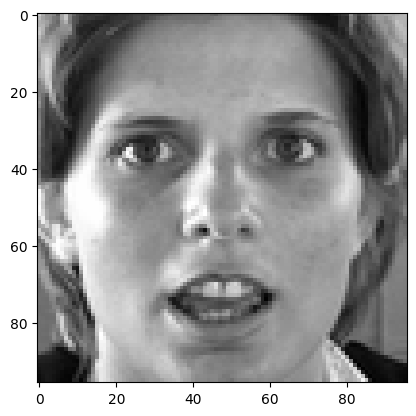

In [11]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap='gray')

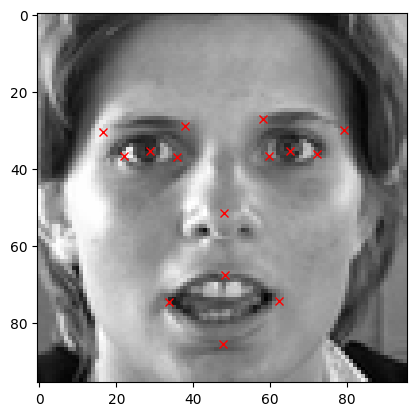

In [12]:
plt.figure()
plt.imshow(facialpoints_df['Image'][i], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

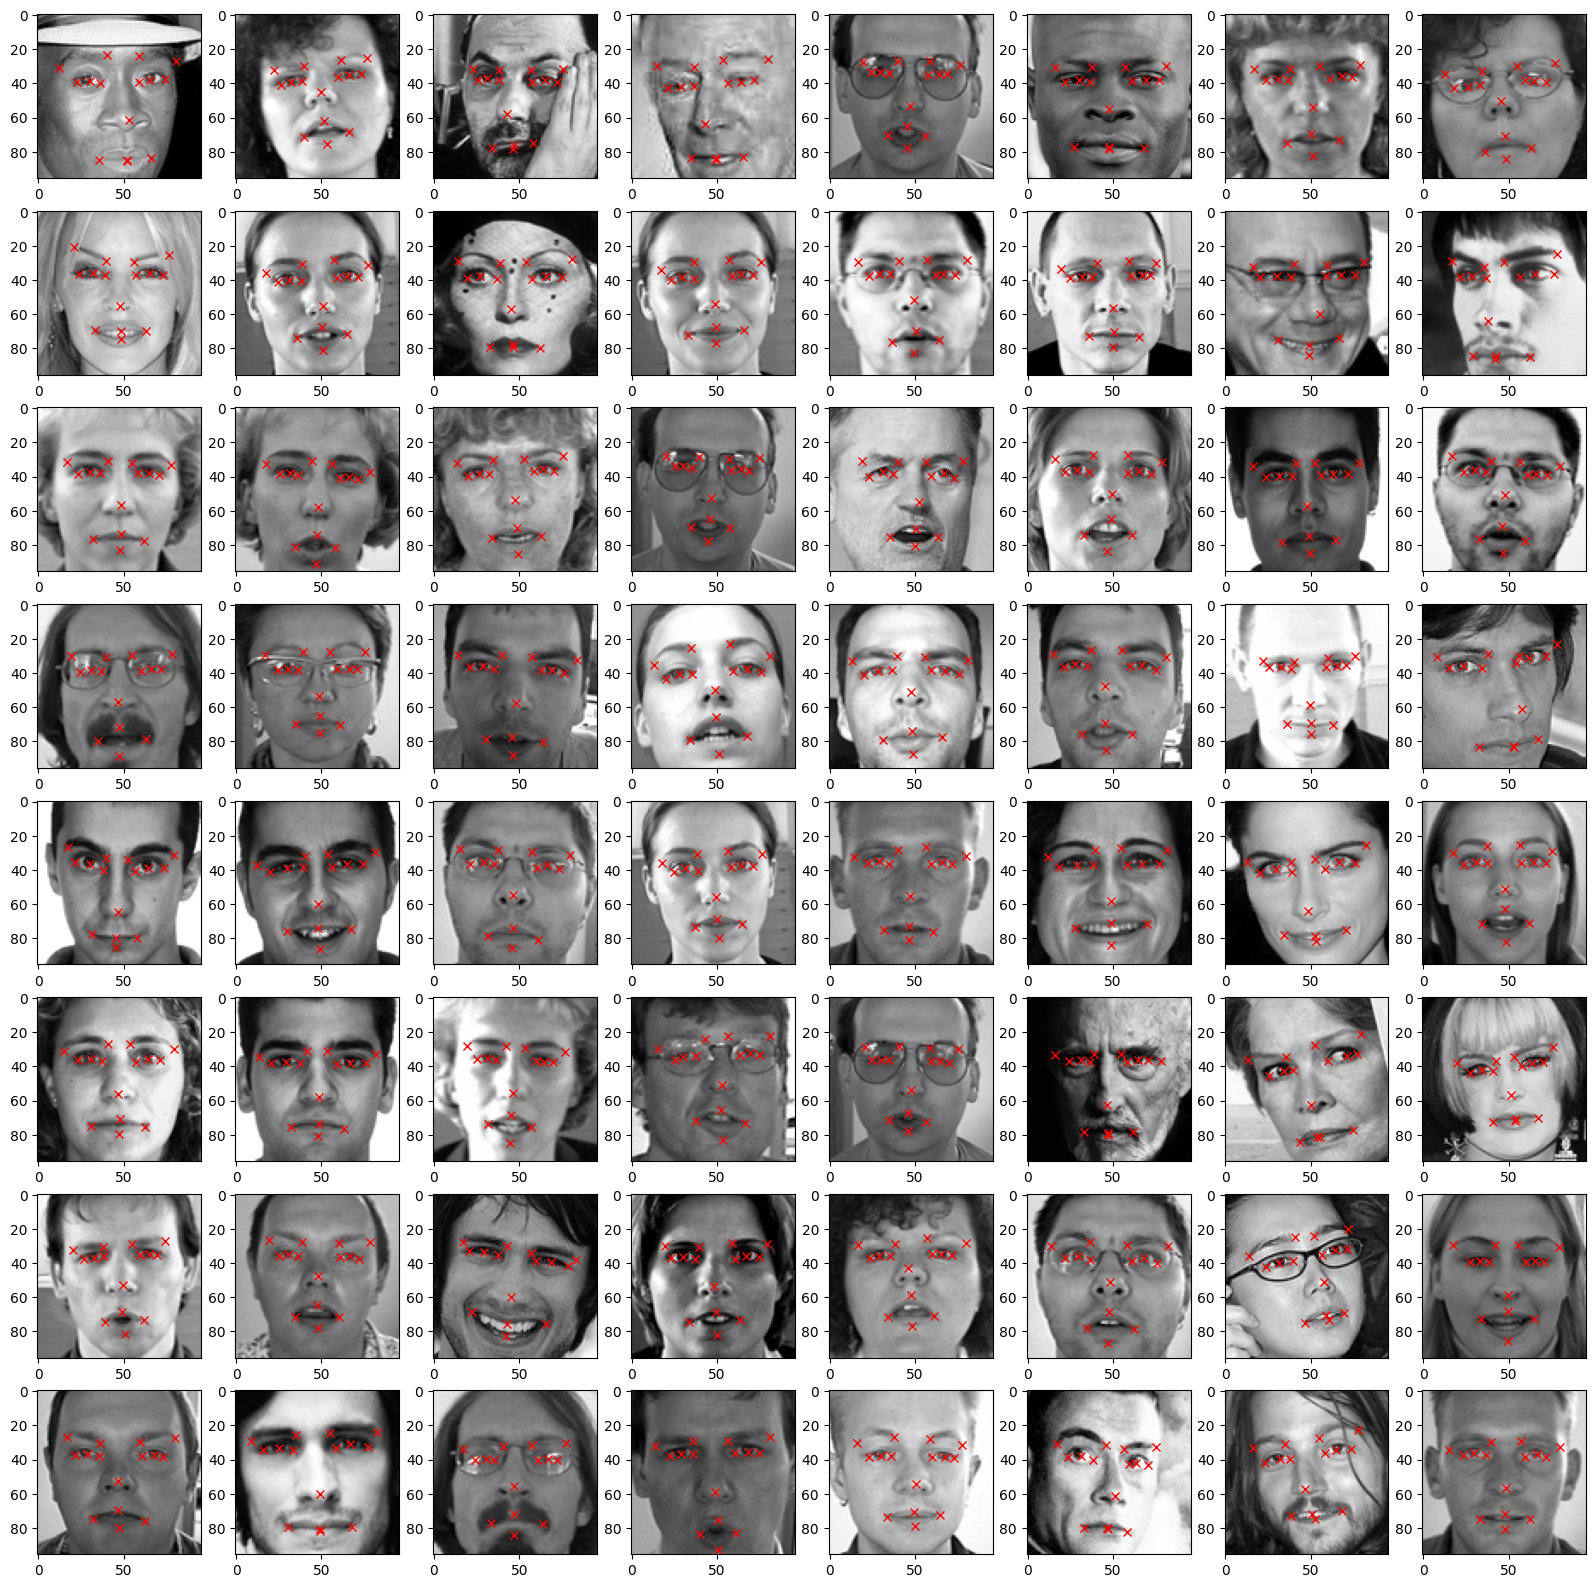

In [13]:
random_numbers = np.random.choice(np.arange(1, len(facialpoints_df)), size=64, replace=False)

fig = plt.figure(figsize=(20,20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    image = plt.imshow(facialpoints_df['Image'][random_numbers[i]], cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(facialpoints_df.loc[random_numbers[i]][j-1], facialpoints_df.loc[random_numbers[i]][j], 'rx')    

### Image Augmentation

In [14]:
import copy
facialpoints_df_copy = copy.copy(facialpoints_df)

In [15]:
columns = facialpoints_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [16]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

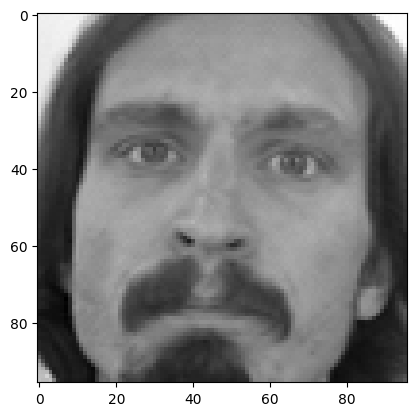

In [17]:
plt.imshow(facialpoints_df['Image'][0], cmap='gray')

In [18]:
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis=0))

In [19]:
facialpoints_df_copy['Image'][0]

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

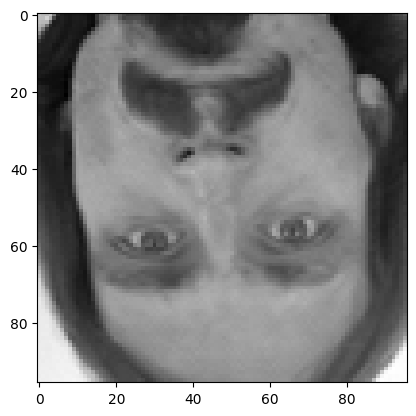

In [20]:
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')

In [21]:
for i in range(len(columns)):
    if i%2 == 1:
        facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96.0 - float(x))

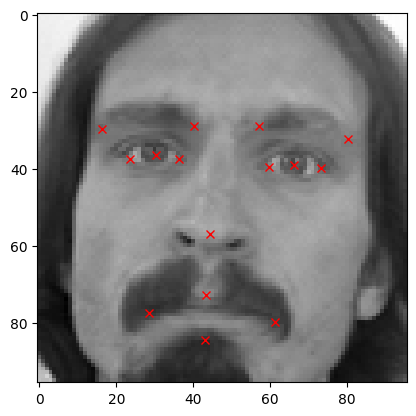

In [22]:
plt.imshow(facialpoints_df['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx')

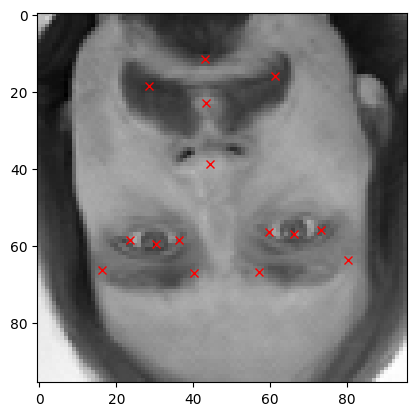

In [23]:
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

In [24]:
facialpoints_df_augmented = np.concatenate((facialpoints_df, facialpoints_df_copy))

In [25]:
facialpoints_df_augmented.shape

(4280, 31)

In [26]:
import random

facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x: np.clip(random.uniform(1, 2)*x, 0.0, 255.0))
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(6420, 31)

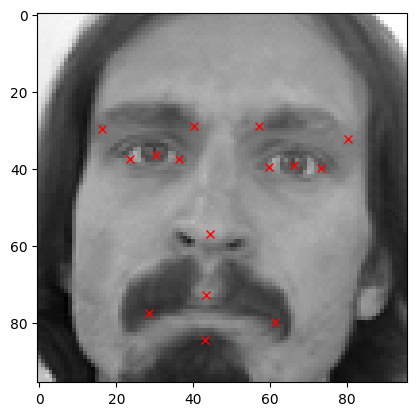

In [27]:
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

### Normalization and preparation of training data

In [28]:
img = facialpoints_df_augmented[:,30]
img = img/255.

In [29]:
X = np.empty((len(img), 96, 96, 1))

In [30]:
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis=2)
    
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [31]:
y = facialpoints_df_augmented[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train.shape

(5136, 96, 96, 1)

In [34]:
X_test.shape

(1284, 96, 96, 1)

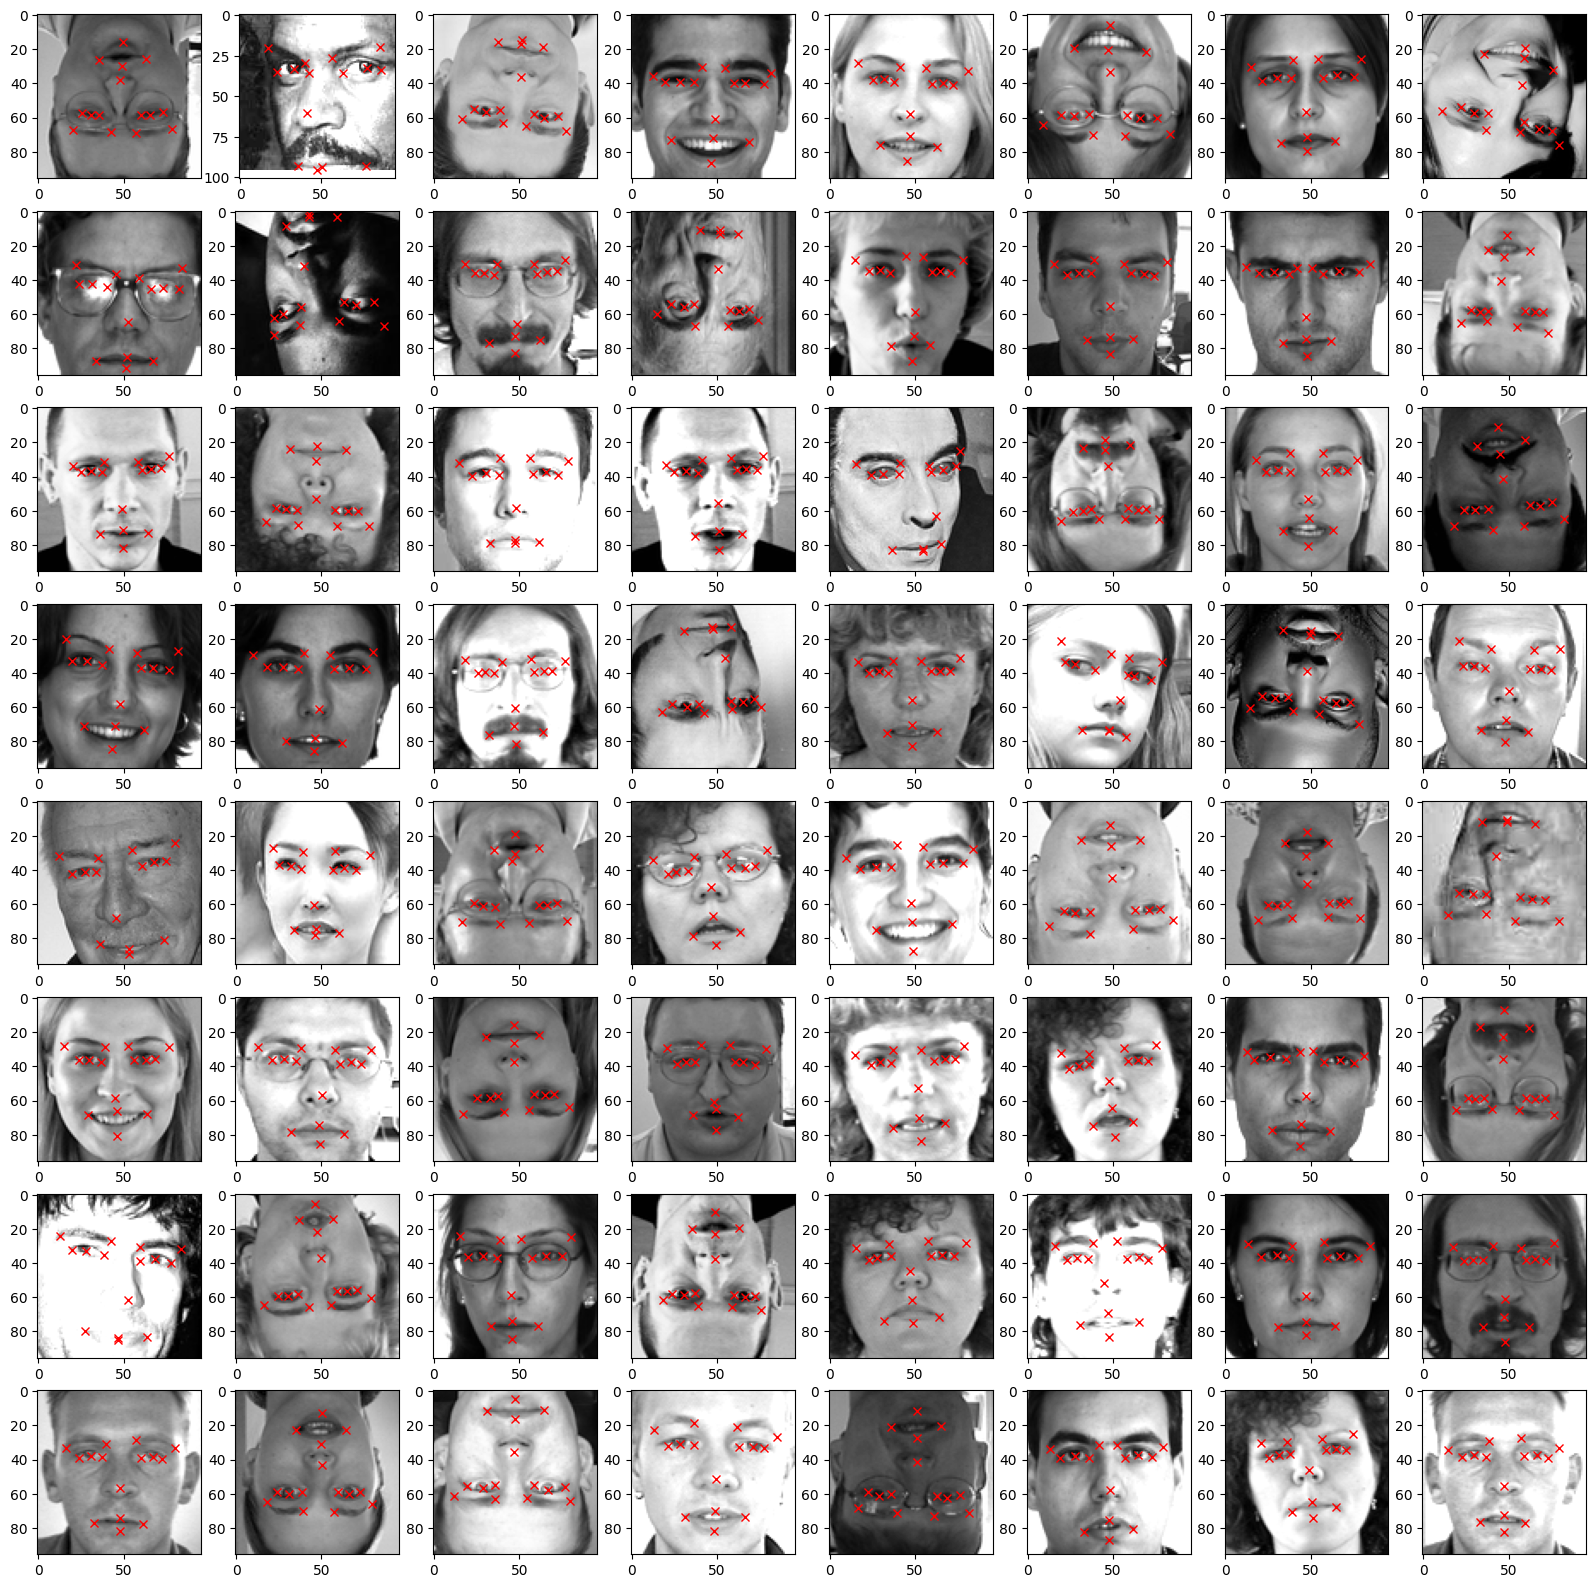

In [35]:
fig = plt.figure(figsize=(20,20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    image = plt.imshow(X_train[i].reshape(96,96), cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')

### Build Deep Residual Neural Network model

In [36]:
def res_block(X, filter, stage):
    # Convolution block
    X_copy = X
    f1, f2, f3 = filter
    
    # Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name='res_'+str(stage)+'_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_c')(X)
    
    # Short Path
    X_copy = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_copy')(X_copy)
    
    # Add data from main and shorts paths
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    # Identity block
    X_copy = X
    
    # Main Path
    X = Conv2D(f1, (1,1), strides=(1,1), name='res_'+str(stage)+'_identity_1_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_identity_1_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_identity_1_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_c')(X)
    
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    
    # Identity block 2
    X_copy = X
    
    # Main Path
    X = Conv2D(f1, (1,1), strides=(1,1), name='res_'+str(stage)+'identity_2_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_identity_2_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'identity_2_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_c')(X)
    
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    return X    

In [37]:
input_shape = (96, 96, 1)

X_input = Input(input_shape)

X = ZeroPadding2D((3,3))(X_input)

# Stage 1
X = Conv2D(64, (7, 7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

# Stage 2
X = res_block(X, filter=[64, 64, 256], stage=2)

# Stage 3
X = res_block(X, filter=[128, 128, 512], stage=3)

# Average Pooling
X = AveragePooling2D((2,2), name='Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)

model = Model(inputs = X_input, outputs=X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']                  
                                                                                              

                                                                                                  
 activation_8 (Activation)      (None, 11, 11, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2identity_2_c (Conv2D)     (None, 11, 11, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 11, 11, 256)  1024       ['res_2identity_2_c[0][0]']      
 ization)                                                                                         
                                                                                                  
 add_2 (Add)                    (None, 11, 11, 256)  0           ['bn_2_identity_2_c[0][0]',      
                                                                  'activation_6[0][0]']           
          

                                                                                                  
 res_3identity_2_c (Conv2D)     (None, 5, 5, 512)    66048       ['activation_17[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 5, 5, 512)   2048        ['res_3identity_2_c[0][0]']      
 ization)                                                                                         
                                                                                                  
 add_5 (Add)                    (None, 5, 5, 512)    0           ['bn_3_identity_2_c[0][0]',      
                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 5, 5, 512)    0           ['add_5[0][0]']                  
          

### Compile and Train Deep Learning Model

In [40]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer=adam, metrics=['accuracy'])

In [41]:
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose=1, save_best_only=True)

In [42]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.05, callbacks=[checkpointer])

Epoch 1/100
305/305 [==============================] - ETA: 0s - loss: 71.7571 - accuracy: 0.6680
Epoch 1: val_loss improved from inf to 87.74496, saving model to weights.hdf5
305/305 [==============================] - 81s 241ms/step - loss: 71.7571 - accuracy: 0.6680 - val_loss: 87.7450 - val_accuracy: 0.7121
Epoch 2/100
305/305 [==============================] - ETA: 0s - loss: 28.8215 - accuracy: 0.7489
Epoch 2: val_loss improved from 87.74496 to 25.40240, saving model to weights.hdf5
305/305 [==============================] - 72s 236ms/step - loss: 28.8215 - accuracy: 0.7489 - val_loss: 25.4024 - val_accuracy: 0.8093
Epoch 3/100
305/305 [==============================] - ETA: 0s - loss: 26.8644 - accuracy: 0.7635
Epoch 3: val_loss did not improve from 25.40240
305/305 [==============================] - 77s 253ms/step - loss: 26.8644 - accuracy: 0.7635 - val_loss: 28.2108 - val_accuracy: 0.6848
Epoch 4/100
305/305 [==============================] - ETA: 0s - loss: 25.9602 - accuracy

Epoch 29/100
305/305 [==============================] - ETA: 0s - loss: 7.0664 - accuracy: 0.8305
Epoch 29: val_loss did not improve from 3.59700
305/305 [==============================] - 69s 226ms/step - loss: 7.0664 - accuracy: 0.8305 - val_loss: 8.7594 - val_accuracy: 0.8755
Epoch 30/100
305/305 [==============================] - ETA: 0s - loss: 6.9370 - accuracy: 0.8399
Epoch 30: val_loss did not improve from 3.59700
305/305 [==============================] - 69s 228ms/step - loss: 6.9370 - accuracy: 0.8399 - val_loss: 4.5752 - val_accuracy: 0.8638
Epoch 31/100
305/305 [==============================] - ETA: 0s - loss: 6.7646 - accuracy: 0.8340
Epoch 31: val_loss did not improve from 3.59700
305/305 [==============================] - 74s 242ms/step - loss: 6.7646 - accuracy: 0.8340 - val_loss: 6.1550 - val_accuracy: 0.8482
Epoch 32/100
305/305 [==============================] - ETA: 0s - loss: 6.3426 - accuracy: 0.8500
Epoch 32: val_loss did not improve from 3.59700
305/305 [=====

Epoch 58/100
305/305 [==============================] - ETA: 0s - loss: 4.9196 - accuracy: 0.8660
Epoch 58: val_loss did not improve from 2.59738
305/305 [==============================] - 76s 250ms/step - loss: 4.9196 - accuracy: 0.8660 - val_loss: 4.3811 - val_accuracy: 0.9027
Epoch 59/100
305/305 [==============================] - ETA: 0s - loss: 5.2080 - accuracy: 0.8623
Epoch 59: val_loss did not improve from 2.59738
305/305 [==============================] - 73s 240ms/step - loss: 5.2080 - accuracy: 0.8623 - val_loss: 5.1672 - val_accuracy: 0.8833
Epoch 60/100
305/305 [==============================] - ETA: 0s - loss: 5.3251 - accuracy: 0.8651
Epoch 60: val_loss did not improve from 2.59738
305/305 [==============================] - 70s 230ms/step - loss: 5.3251 - accuracy: 0.8651 - val_loss: 6.8135 - val_accuracy: 0.9222
Epoch 61/100
305/305 [==============================] - ETA: 0s - loss: 5.1196 - accuracy: 0.8637
Epoch 61: val_loss did not improve from 2.59738
305/305 [=====

Epoch 87/100
305/305 [==============================] - ETA: 0s - loss: 3.5413 - accuracy: 0.8789
Epoch 87: val_loss improved from 2.36258 to 2.05519, saving model to weights.hdf5
305/305 [==============================] - 68s 223ms/step - loss: 3.5413 - accuracy: 0.8789 - val_loss: 2.0552 - val_accuracy: 0.8988
Epoch 88/100
305/305 [==============================] - ETA: 0s - loss: 3.3083 - accuracy: 0.8768
Epoch 88: val_loss did not improve from 2.05519
305/305 [==============================] - 69s 227ms/step - loss: 3.3083 - accuracy: 0.8768 - val_loss: 2.6202 - val_accuracy: 0.9144
Epoch 89/100
305/305 [==============================] - ETA: 0s - loss: 3.5355 - accuracy: 0.8756
Epoch 89: val_loss did not improve from 2.05519
305/305 [==============================] - 72s 237ms/step - loss: 3.5355 - accuracy: 0.8756 - val_loss: 2.5752 - val_accuracy: 0.9144
Epoch 90/100
305/305 [==============================] - ETA: 0s - loss: 3.2372 - accuracy: 0.8803
Epoch 90: val_loss did not i

In [43]:
# save the model
model_json = model.to_json()
with open('KeyPointDetector.json', 'w') as json_file:
    json_file.write(model_json)

In [44]:
# load the trained model
with open('KeyPointDetector.json', 'r') as json_file:
    json_SavedModel = json_file.read()
model = tf.keras.models.model_from_json(json_SavedModel)
model.load_weights('weights.hdf5')
model.compile(loss="mean_squared_error", optimizer=adam, metrics=['accuracy'])

### Access the model

In [45]:
# Evaluate the trained model
result = model.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 7s 135ms/step - loss: 2.0812 - accuracy: 0.8777
Accuracy : 0.8777258396148682


In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

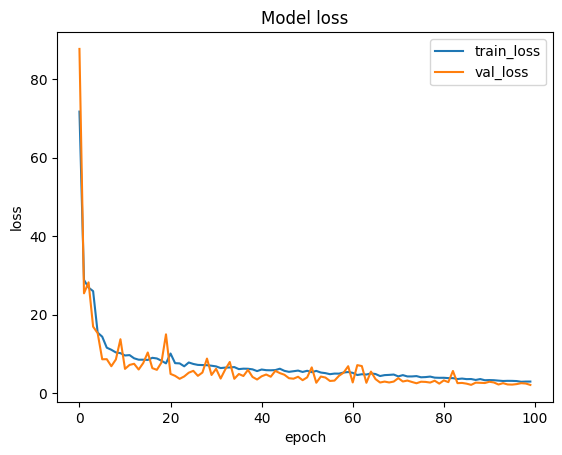

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

In [48]:
df_predict = model.predict(X_test)

41/41 [==============================] - 7s 134ms/step


In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE VALUE : {}".format(rms))

RMSE VALUE : 1.4426514744026255


In [50]:
df_predict = pd.DataFrame(df_predict, columns = columns)
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          65.518501          36.352970           31.652845   
1          66.167450          57.875118           28.695032   
2          63.400581          58.543484           33.875114   
3          65.375259          37.696224           29.203936   
4          65.526054          37.046436           30.868824   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.647289                59.796368                37.128170   
1           58.003922                58.563122                56.711594   
2           58.626740                57.312275                57.620148   
3           38.420147                58.355457                38.735474   
4           35.161064                58.471722                37.906574   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                71.189484                36.919819                 37.229301   
1                74.602768                56.744907                 36.777630   
2                69.882217                58.105907                 39.247150   
3                72.962067                38.713207                 36.555809   
4                72.958389                38.216602                 38.039429   

   right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                 37.217049  ...   48.690323   54.163506            62.141720   
1                 56.924450  ...   46.655331   37.644623            63.091660   
2                 57.669029  ...   41.516563   41.352676            61.504578   
3                 39.047783  ...   48.261948   56.378632            62.861626   
4                 36.617104  ...   47.842743   58.336082            60.181297   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            71.482765             36.472401             71.609367   
1            16.932816             32.017151             16.817051   
2            26.540123             36.417080             26.630922   
3            77.032722             33.452942             77.557007   
4            76.753471             31.532574             75.047760   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               49.011284               67.388351                  49.095898   
1               47.179611               20.400866                  47.165806   
2               46.334595               28.909124                  46.637844   
3               48.438419               73.129204                  48.436584   
4               46.373360               74.471802                  45.935963   

   mouth_center_bottom_lip_y  
0                  78.244499  
1                  12.248325  
2                  21.511045  
3                  81.461205  
4                  79.445038  

[5 rows x 30 columns]

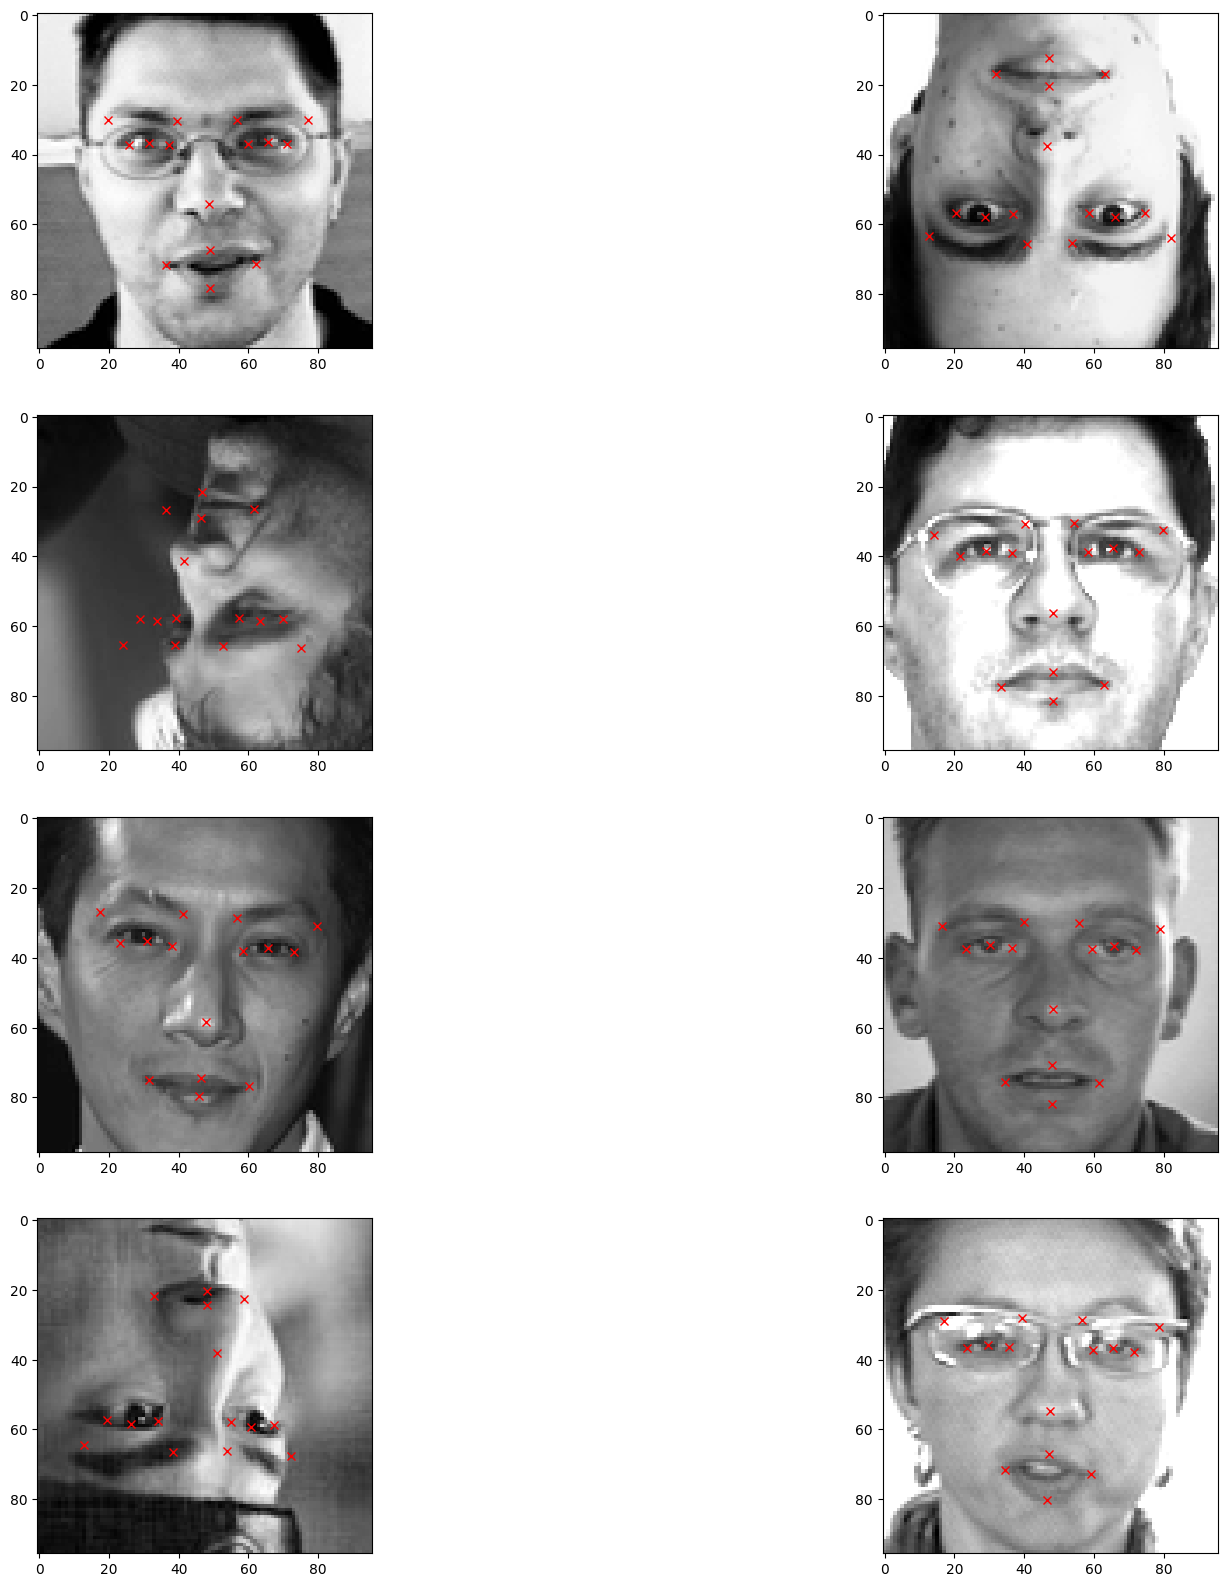

In [51]:
fig = plt.figure(figsize=(20,20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i+1)
    
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    for j in range(1, 31, 2):
        plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')